Please **submit this Jupyter notebook through Canvas** no later than **Monday November 5 12:59**, before the start of the lecture.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Rebecca de Feijter (10639918)

Tessa Ridderikhoff (10759697)

-----
# Exercise 1
Compute a solution to the equation

$$ 600 x^4 - 550 x^3 + 200 x^2 - 20 x - 1 = 0, \quad x \in [0.1, 1.0], $$

using each of the following methods.

## (a)
Using the interval bisection method.

In [62]:
# set range
a = 0.11
b = 1.0

# define function f
def f(x):
    return 600*x**4 - 550*x**3 + 200*x**2 - 20*x - 1

# save intermediate boundary-values
upperibmethod = []
loweribmethod = []

# set error tolerance: how close to each other need a and b be?
tol = 10**-5

# while a and b are too far apart, perform the interval bisection method
while (b - a) > tol:
    
    #determine middle of a and b
    middle = a + (b - a) / 2
    
    # if middle has a negative sign, make middle new a
    if f(middle) < 0:
        a = middle
        
    # otherwise, make middle new b
    else:
        b = middle
        
    # save intermediate boundaries
    upperibmethod.append(b)
    loweribmethod.append(a)

# print boundaries
print a, b

0.232351913452 0.232358703613
-1.46838289767e-05 8.01570594424e-05


## (b)
Using newton's method.

In [71]:
# define derivative of function f
def fprime(x):
    return 2400*x**3 - 1650*x**2 + 400*x - 20

# initial guess
xk = 1.0

# save intermediate values
newtonmethod = []

# perform Newton's method while f(xk) is not approximately 0
while (f(xk) > tol):
    xk = xk - (f(xk)/fprime(xk))
    newtonmethod.append(xk)
    
# print final approximation
print xk

0.232352964818


## (c)
Using the secant method.

In [75]:
# initial two guesses
x0 = 1.0
x1 = 0.9

# save intermediate results
secantmethod = []

# while f(x1) is approximately larger than 0
while (f(x1) > tol):
    
    # determine next approximation
    nextX = x1 - (f(x1)*(x1 - x0))/(f(x1) - f(x0))
    
    # update x0 and x1
    x0 = x1
    x1 = nextX
    secantmethod.append(x1)
    
# print final approximation
print x1

0.232353079783


## (d)
Compare the speed of convergence you observe for the three methods. Plot your results and briefly explain.

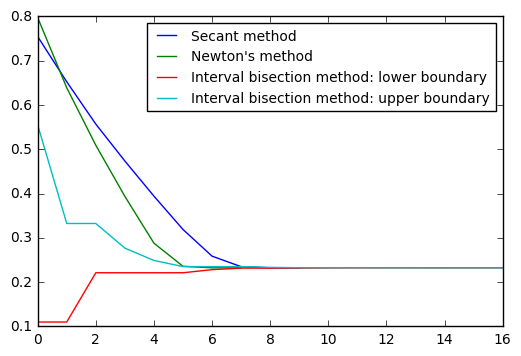

In [76]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.plot(list(range(0, len(secantmethod))), secantmethod, label = "Secant method")
ax.plot(list(range(0, len(newtonmethod))), newtonmethod, label = "Newton's method")
ax.plot(list(range(0, len(ibmethod))), loweribmethod, label = "Interval bisection method: lower boundary")
ax.plot(list(range(0, len(ibmethod))), upperibmethod, label = "Interval bisection method: upper boundary")
ax.legend(fontsize = "medium")

plt.show()

As can be seen, all methods converge to a similar approximation rather quickly, with a good approximation in 7 iterations. Newton's method appears to converge the quickest, in 5 iterations. However, although the interval bisection method is known to be slower, the upper boundary of this method becomes very close to the final approximation in 5 iterations as well. After 7 iterations, this method has lead to a good approximation, making this method equally fast as the Secant method, although its intermediate results are closer to the final approximation more quickly than the Secant method. 

<font color=red>Fair conclusion. However, a semi-log-y plot of $k$ against $|f(x_k)|$ would've shown the quadratic convergence rate of Newton versus the linear convergence rate of the bisection method, which is something you can't really see right now. Minus 1/2 point.</font>

--------
# Exercise 2
Consider the following boundary value problem involving a nonlinear ordinary differential equation:

$$y''(x) + \exp(y(x)) = 0, \quad 0 < x < 1, \quad y(0) = y(1) = 0.$$

We can approximate the solution by discretizing the differential equation and solving the resulting system of nonlinear equations. Suppose we use $n+2$ discretization points for $x$ (denoted $x_k = kh$ for $k \in \{0, \ldots, n+1\}$ and $h = 1/(n+1)$, the approximate solution is denoted $y_k = y(x_k)$.

We will use a _central finite difference_ approximation for the second derivative: 

$$y''(t_k) \approx (y_{k+1} - 2 y_k + y_{k-1})/h^2.$$

From the boundary values, we conclude that $y_0 = y_{n+1} = 0$. The result is a set of $n$ nonlinear equations

$$ \frac{y_{k+1} + y_{k-1} - 2 y_k}{h^2} + \exp y_k = 0, \quad k = 1, \ldots, n.$$

## (a)
Write this set of equations as $\mathbf{f}(\mathbf x) = \mathbf{0}$, where $\mathbf f$ is a function from $\mathbf x \in \mathbb R^{n}$ to $\mathbf f(\mathbf x) \in \mathbb R^{n}$. What is $\mathbf x$, and what is $\mathbf f$?

To be able to solve these equations, we need to define $x_{k} = y_{k}$. This means that $x = [y_{1} \ldots y_{n}]$. We can then define the set of equations of $f(x) = 0$ as:

$f(y_{1}, \ldots, y_{n}) = (\frac{y_{2} - 2y_{1}}{h^{2}} + exp(y_{1}), \ldots , \frac{y_{n + 1} + y_{n - 1} - 2y_{n}}{h^{2}} + exp(y_{n})) = 0$.  

## (b)
What is the Jacobian corresponding to this set of equations?

The Jacobian is filled with $\frac{\partial f_{i}}{\partial x_{j}}$, leading in this case to (since $x_{k} = y_{k}$):

$${\displaystyle J = \left( \begin{array}{rrrrr} \frac{-2}{h^{2}} + e^{x} &  \frac{1}{h^{2}}  &  0 &  0& \ldots \\ \frac{1}{h^{2}}  & \frac{-2}{h^{2}} + e^{x} & \frac{1}{h^{2}} & 0 &\ldots   \\ 0 & \frac{1}{h^{2}} & \frac{-2}{h^{2}} + e^{x} &  \frac{1}{h^{2}} &\ldots \\ \vdots & & & & \ddots \end{array} \right) \,}$$

## (c)
Take $n = 24$. Using Newton's method, solve the system of equations. Try various initial guesses, including zero (i.e., $y_k = 0$ for all $k$). Show the solutions you find, and discuss the convergence that you observe.

n = 24<br \>
k = 0, ..., 25<br \>
h = 1/n+1 = 1/25<br \>
$x_{k} = k/25$

<font color='red'>(c) missing. -3 points</font>